<a href="https://colab.research.google.com/github/rahil161190/Walmart-Case-Study/blob/main/Rahil_Walmart_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 .csv

--2025-03-13 05:25:04--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.176, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094’

walmart_data.csv?16 100%[===================>]  21.96M  92.8MB/s    in 0.2s    

2025-03-13 05:25:04 (92.8 MB/s) - ‘walmart_data.csv?1641285094’ saved [23027994/23027994]

--2025-03-13 05:25:04--  http://.csv/
Resolving .csv (.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘.csv’
FINISHED --2025-03-13 05:25:04--
Total wall clock time: 0.4s
Downloaded: 1 files, 22M in 0.2s (92.8 MB/s)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('walmart_data.csv?1641285094')

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
df.shape

(550068, 10)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


## Q-1Defining Problem Statement and Analyzing basic metrics (10 Points)
# Q-1a) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

Q-1b) Non-Graphical Analysis
 ​

Q-1c) Visual Analysis





In [ ]:
for i in df.columns:
  print(i, ':', df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105



*   From the above observation we can conclude that only column 'Purchase' , 'Occupation' can be considered as continuous and rest of them we considered as categories.



In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000



*   Average amount of purchase value is 9263
*   Purchase amount for 75% percentile person was below 12000.




In [ ]:
df.describe(include = object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821




*   Product_ID of P00265242 was purchased 1880 times i.e most number of times customer purchased. We can say this product is widely popular.

*   Most number of the purchases were done by the age group of 26-35.





# Q-1b) Non-Graphical Analysis: Value counts and unique attributes
 ​

Q:) Which gender is contribution more to revenue ?

In [ ]:
np.round((df['Gender'].value_counts(normalize = True))*100,2)

,proportion
Gender,
M,75.31
F,24.69



*   75% percentage orders are from Male whereas 25% are female.


In [ ]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

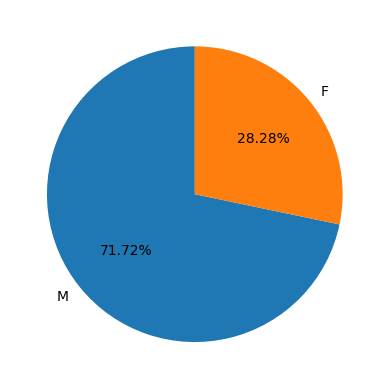

In [ ]:
uniq_Gen_User_ID = df[['Gender','User_ID']].drop_duplicates()
uniq_Gen_User_ID['Gender'].value_counts()
plt.pie(
    uniq_Gen_User_ID['Gender'].value_counts(),
    labels =uniq_Gen_User_ID['Gender'].value_counts().index,
    autopct = '%.2f%%',
    startangle = 90
)
plt.show()


*   Unique Male customers are 72% who made the orders.
*   Unique Female customers are 28%  who made the orders.



In [ ]:
np.round((df.groupby(['Gender'])['Purchase'].sum())/(df['Purchase'].sum())*100,2)

,Purchase
Gender,
F,23.28
M,76.72


In [ ]:
np.round((df.groupby(['Marital_Status'])['User_ID'].nunique()/df['User_ID'].nunique())*100,2)

,User_ID
Marital_Status,
0,58.0
1,42.0



*   Unique customers who are having marital_status of 0 are 58%.
*   Unique customers who are having marital_status of 1 are 42%.



In [ ]:
np.round((df.groupby(['Age'])['User_ID'].nunique()/df['User_ID'].nunique())*100,2)

,User_ID
Age,
0-17,3.70
18-25,18.15
26-35,34.85
36-45,19.81
46-50,9.01
51-55,8.16
55+,6.31




*   As an proportion 35%  unique customers are from 26-35 age group.
*   This proportion gets drop as we go higher in age.





In [ ]:
np.round((df.groupby(['Age'])['Purchase'].sum())/(df['Purchase'].sum())*100,2)

,Purchase
Age,
0-17,2.65
18-25,17.93
26-35,39.87
36-45,20.15
46-50,8.26
51-55,7.20
55+,3.94




*   Proportion in % amount spent by each age group of an overall amount spent





In [ ]:
np.round((df.groupby(['Occupation'])['User_ID'].nunique()/df['User_ID'].nunique())*100,2)

,User_ID
Occupation,
0,11.68
1,8.78
2,4.35
3,2.89
4,12.56
5,1.88
6,3.87
7,11.36
8,0.29




*   As an proportion around 11-12% customers are from occupation 0,4,7



In [ ]:
np.round(df['City_Category'].value_counts(normalize = True)*100,2)

,proportion
City_Category,
B,42.03
C,31.12
A,26.85



*   Number of orders are mostly from City category B , whereas for A its much lesser.



Q:) Are there any city category spending less ?

In [ ]:
np.round((df.groupby(['City_Category'])['User_ID'].nunique()/df['User_ID'].nunique())*100,2)

,User_ID
City_Category,
A,17.74
B,28.98
C,53.28



*   Unique customers are mostly from C i.e 54% whereas from A category 18%(least)
*   We can infer from the above two table that C has most number of unique customers but number of orders are not higher than B which has half of unique customer of C





In [ ]:
np.round((df.groupby(['City_Category'])['Purchase'].sum()/df['Purchase'].sum())*100,2)

,Purchase
City_Category,
A,25.83
B,41.52
C,32.65


In [ ]:
np.round(df.groupby(['City_Category'])['Purchase'].mean(),2)

,Purchase
City_Category,
A,8911.94
B,9151.30
C,9719.92



*   From the above 3 table we can conclude City category B as lesser number of users than C and yet spending heavily or more than city category C.
*   City category A has least number of users but still comparable total spending amount with city category C which has much larger unique customers.



Q:) Which product_Category is being bought frequently in specific city category knowing that product category has performed good in other city category?

In [ ]:
df.groupby(['City_Category'])['Product_Category'].value_counts()

City_Category  Product_Category
A              5                   42211
               1                   35081
               8                   32179
               11                   6601
               2                    6141
               6                    5507
               3                    4943
               4                    3050
               16                   2848
               15                   1717
               13                   1614
               10                   1333
               7                    1226
               12                   1063
               18                    753
               14                    481
               20                    468
               19                    273
               17                    121
               9                     110
B              5                   64138
               1                   58253
               8                   47553
               11                  10485
               2                   10444
               3                    8587
               6                    8526
               4                    5226
               16                   4038
               15                   2638
               13                   2271
               10                   2063
               12                   1675
               7                    1599
               18                   1389
               20                    753
               14                    632
               19                    462
               17                    267
               9                     174
C              1                   47044
               5                   44584
               8                   34193
               2                    7279
               11                   7201
               3                    6683
               6                    6433
               4                    3477
               16                   2942
               15                   1935
               10                   1729
               13                   1664
               20                   1329
               12                   1209
               18                    983
               7                     896
               19                    868
               14                    410
               17                    190
               9                     126
Name: count, dtype: int64


*   From the above table we can say the reason of total purchasing amount of city category B higher than C even having unique customers lesser than C is that :-
1.    Number of orders for Product_category of 11,2 and 10 are much higher
comapare to other city category and amongs them 10 is the costliest category ,whereas product_Category of 5,1,8 are most bought from every city category.




Q:) How can we increase sales in city _category C given that customer base is much higher than others?

In [ ]:
df[(df['City_Category'] == 'C')| (df['Gender'] == 'F')]['Product_Category'].value_counts()

,count
Product_Category,
5,74140
1,63614
8,57664
2,11187
3,10516
11,10506
6,9592
4,5973
16,4597


In [ ]:
df[(df['City_Category'] == 'C')| (df['Gender'] == 'M')]['Product_Category'].value_counts()

,count
Product_Category,
1,123808
5,121377
8,90454
11,20982
2,19956
6,17307
3,16380
4,9257
16,8173




*   We can suggest company to advertise or give promotional offer for product category 2 and 10 for the city category C for both male and female as it will boost the sales.




In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0




*   There are no Null values in the data




Creating extra column

In [ ]:
bin = [-1,2500,5000,6500,8000,9500,11000,13500,15000,20000,25000]
labl = ['<2.5k','2.5k-5k','5k-6.5k','6.5-8k','8k-9.5k','9.5k-11k','11k-13.5k','13.5k-15k','15k-20k','>25k']
df['Purchase_Cat'] = pd.cut(df['Purchase'],bins= bin,labels = labl)

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_Cat
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,8k-9.5k
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,15k-20k
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,<2.5k
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,<2.5k
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,6.5-8k
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,<2.5k
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,<2.5k
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,<2.5k
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,<2.5k


# Q-1c) Visual Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_copy = df[['Gender','Age','Occupation','Marital_Status','Product_Category','Purchase','Stay_In_Current_City_Years']].copy()
df_copy['Gender'].replace(['M','F'],[1,0],inplace = True)
df_copy['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[0,1,2,3,4,5,6],inplace = True)
df_copy['Stay_In_Current_City_Years'].replace(['1','2','3','4+','0'],[0,1,2,3,4],inplace = True)

<ipython-input-12-416eaba8ae42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Gender'].replace(['M','F'],[1,0],inplace = True)
<ipython-input-12-416eaba8ae42>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Gender'].replace(['M','F'],[1,0],inplace = True)
<ipython-input-12-416e

In [ ]:
df_copy.corr()

,Gender,Age,Occupation,Marital_Status,Product_Category,Purchase,Stay_In_Current_City_Years
Gender,1.000000,-0.004262,0.117291,-0.011603,-0.045594,0.060346,0.032242
Age,-0.004262,1.000000,0.091463,0.311738,0.061197,0.015839,-0.031528
Occupation,0.117291,0.091463,1.000000,0.024280,-0.007618,0.020833,-0.004073
Marital_Status,-0.011603,0.311738,0.024280,1.000000,0.019888,-0.000463,-0.024155
Product_Category,-0.045594,0.061197,-0.007618,0.019888,1.000000,-0.343703,0.001661
Purchase,0.060346,0.015839,0.020833,-0.000463,-0.343703,1.000000,-0.002989
Stay_In_Current_City_Years,0.032242,-0.031528,-0.004073,-0.024155,0.001661,-0.002989,1.000000


<Axes: >

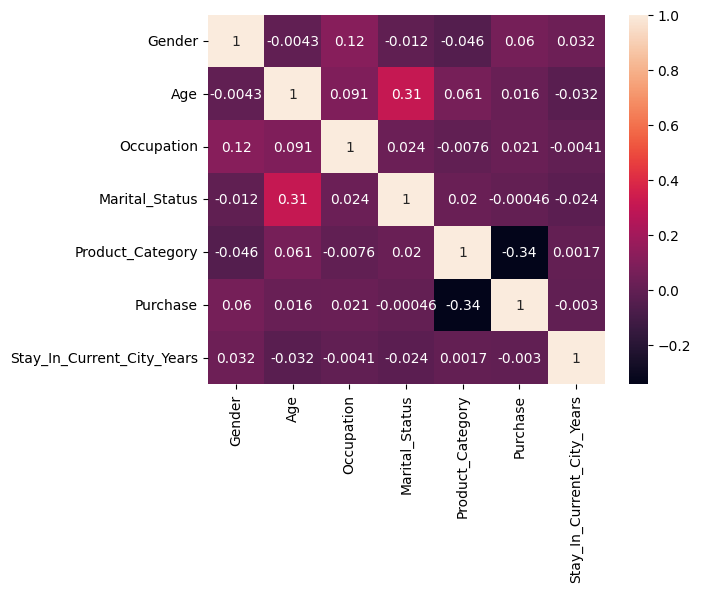

In [ ]:
sns.heatmap(df_copy.corr(),annot = True)



*   We can conclude from the heatmap that data attributes are not co related to each other in any manner.




<Axes: xlabel='Gender', ylabel='count'>

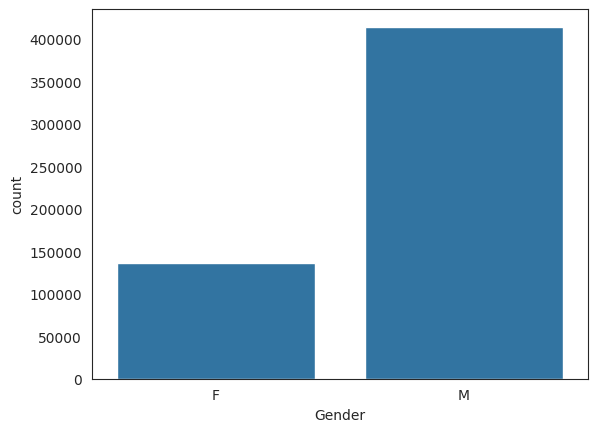

In [ ]:
sns.countplot(x='Gender',data =df)



*   This bar plot gives us count of orders for Male and Female
*   Number of orders from Male are much higher.



<Axes: xlabel='Purchase', ylabel='Density'>

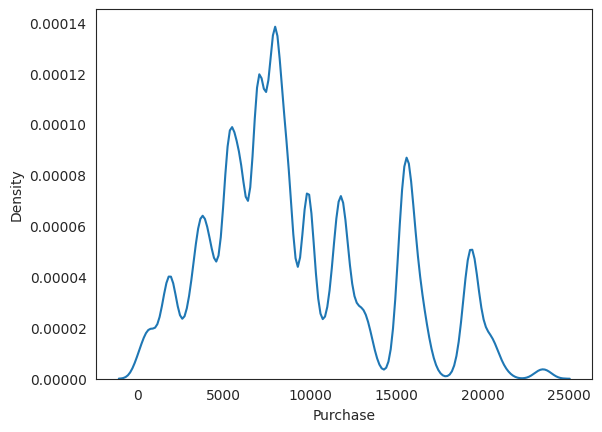

In [ ]:
sns.kdeplot(data = df,x='Purchase')



*   This kde plot gives us the density curve
*   Purchase amount range 6k-10k the most dense region.



Q: What is Total amount spend my male and female ?

In [ ]:
df.groupby(['Gender'])['Purchase'].sum().reset_index()

,Gender,Purchase
0,F,1186232642
1,M,3909580100


Q: What is Total avg amount spend my male and female ?

In [ ]:
df.groupby(['Gender'])['Purchase'].mean().reset_index()

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


Q:- Which age group ordered the most?

<Axes: xlabel='Age', ylabel='count'>

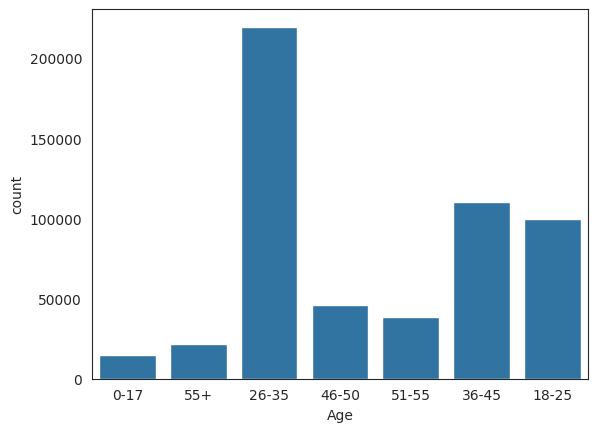

In [ ]:
sns.countplot(x='Age',data =df)



*   Age group of 26-35 ordered the most.
*   There is drastical fall in terms of number of order for the age group of 46-50 and 51-55.
*   We can also conclude that age group of 36-45 also has less number of orders compare to group of 26-35.
*   Least number of orders are from 0-17 and also age above 55+





Q:- Which City category ordererd the most?

<Axes: xlabel='City_Category', ylabel='count'>

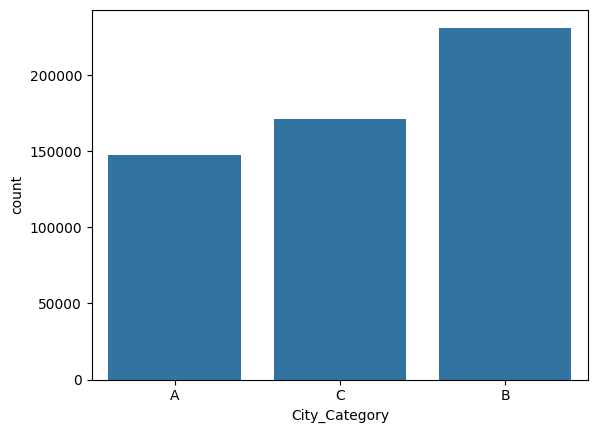

In [ ]:
sns.countplot(x='City_Category',data =df)



*   City_Category B ordered the most number of times..



Q:- Which Marital_Status ordererd the most?

<Axes: xlabel='Marital_Status', ylabel='count'>

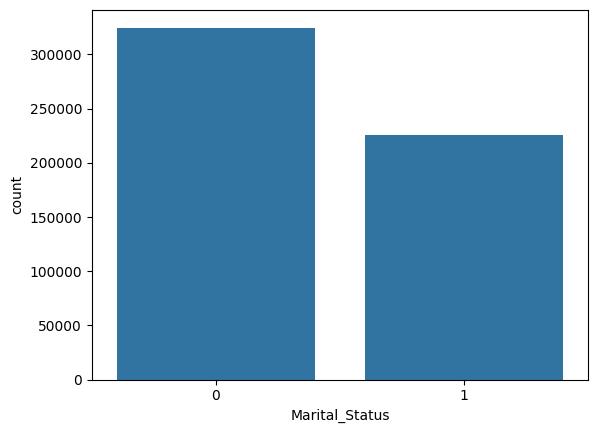

In [ ]:
sns.countplot(x='Marital_Status',data =df)



*   Marital_Status of tag 0 ordered the most.



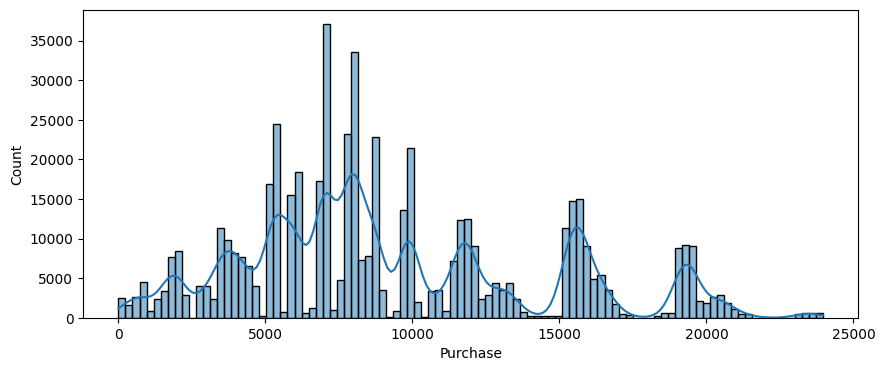

In [ ]:
plt.figure(figsize = (10,4))
sns.histplot(x='Purchase',data =df,kde =True,bins = 100,linewidth = 1)
plt.show()


*   Distribution is not normal




<Axes: xlabel='Gender', ylabel='count'>

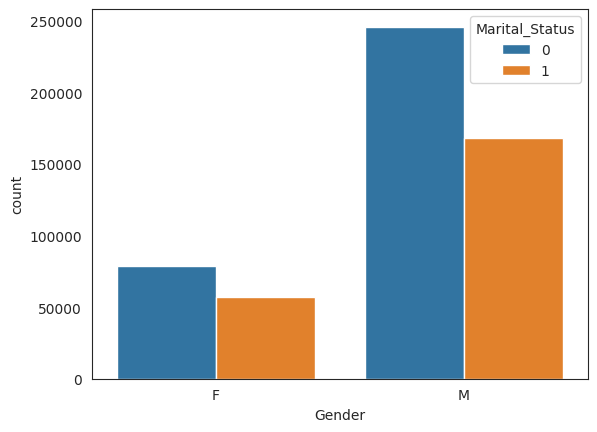

In [ ]:
sns.countplot(x='Gender',data =df,hue = 'Marital_Status')


*   Marital_status of 1 has less number of order than 0 for both male and female.




<Axes: xlabel='Product_Category', ylabel='count'>

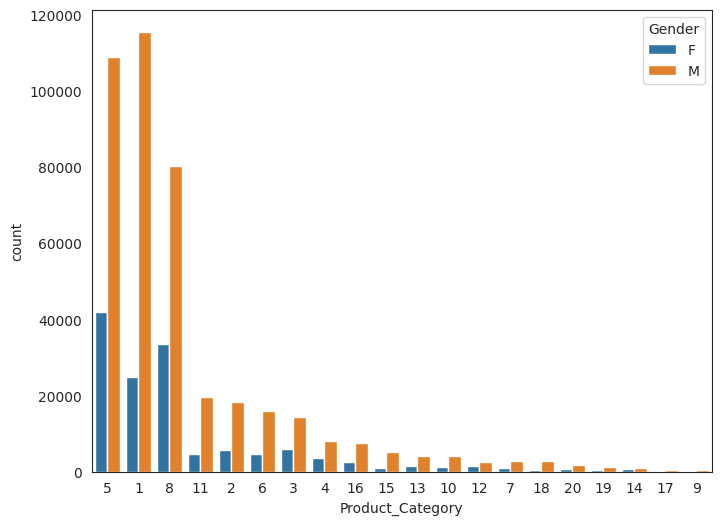

In [ ]:
order =  df['Product_Category'].value_counts().index
plt.figure(figsize = (8,6))
sns.countplot(data =df,x = 'Product_Category',order= order,hue = 'Gender')



*   Product Category 5,1 and 8 are the 3 most purchased across Male and Female.




<Axes: xlabel='Product_Category', ylabel='count'>

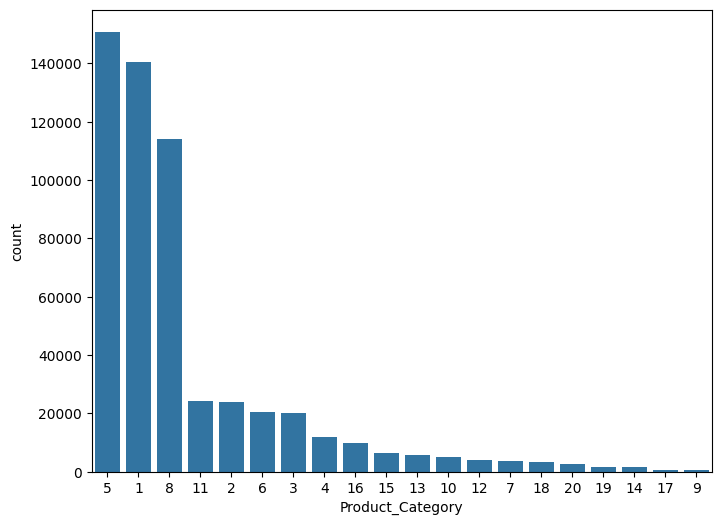

In [ ]:
order =  df['Product_Category'].value_counts().index
plt.figure(figsize = (8,6))
sns.countplot(data =df,x = 'Product_Category',order= order)

Text(0.5, 0, 'Product_Category')

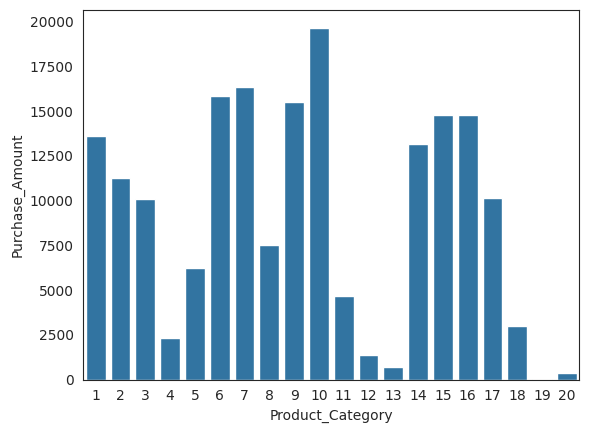

In [ ]:
sns.barplot(x = df.groupby(['Product_Category'])['Purchase'].mean().sort_values(ascending = False).index,y = df.groupby(['Product_Category'])['Purchase'].mean().sort_values(ascending = False))
plt.ylabel('Purchase_Amount')
plt.xlabel('Product_Category')



*   On an average purchase_amount of product_category 10 was highest.




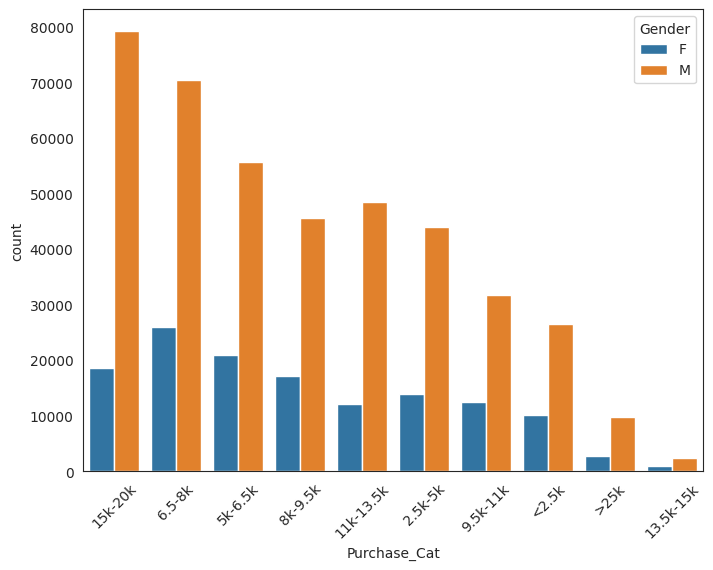

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(data =df,x = 'Purchase_Cat',order = df['Purchase_Cat'].value_counts().index,hue = 'Gender')
plt.xticks(rotation = 45)
plt.show()



*   We can the most number of orders were from purchase category of 15-20k for male and least number of order for purchase category of 13.5-15k
*   For female most number of orders are from 6.5k-8k.
*   We can conclude that 15k-20k bar is an outlier and also product under this category are being bought frequently.
*   We can also conclude that product category of 10 is costlier than other and is frequently bought by the customers even after knowing it is high price.





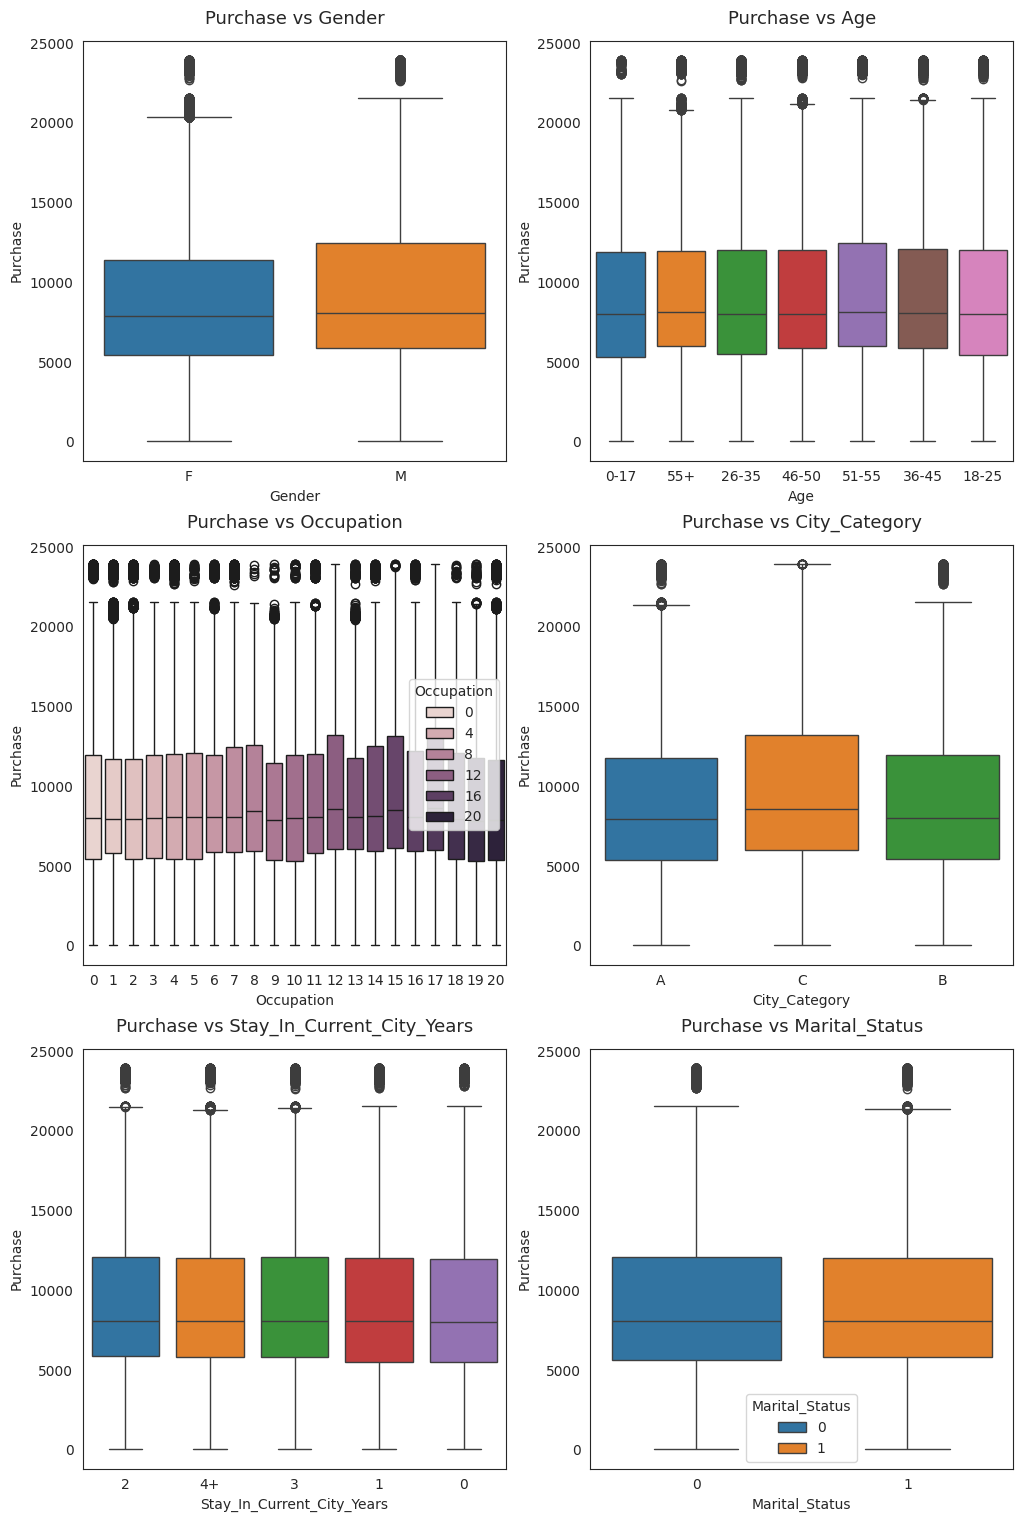

In [ ]:
col_list = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years', 'Marital_Status']
fig,axs = plt.subplots(nrows = 3,ncols = 2,figsize = (12,12))
sns.set_style("white")
fig.subplots_adjust(top=1.3)

count = 0
for row in range(3):
  for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=col_list[count], hue=col_list[count], ax=axs[row, col])
        axs[row, col].set_title(f"Purchase vs {col_list[count]}", pad=12, fontsize=13)
        count+=1
plt.show()




*   For male and female graph we can observer there are many outliers whose purchase amount for an order above 20k
*   Median for category of 'stay_in_current_city_year','marital_status','age' are almost same amongs them.
*   We can conclude one thing that for all categorys there are outliers. Product_category of 10 is having mean of purchase amount of almost 20k, from this we can conclude that this outlier orders are from prodouct category of 10 mostly.




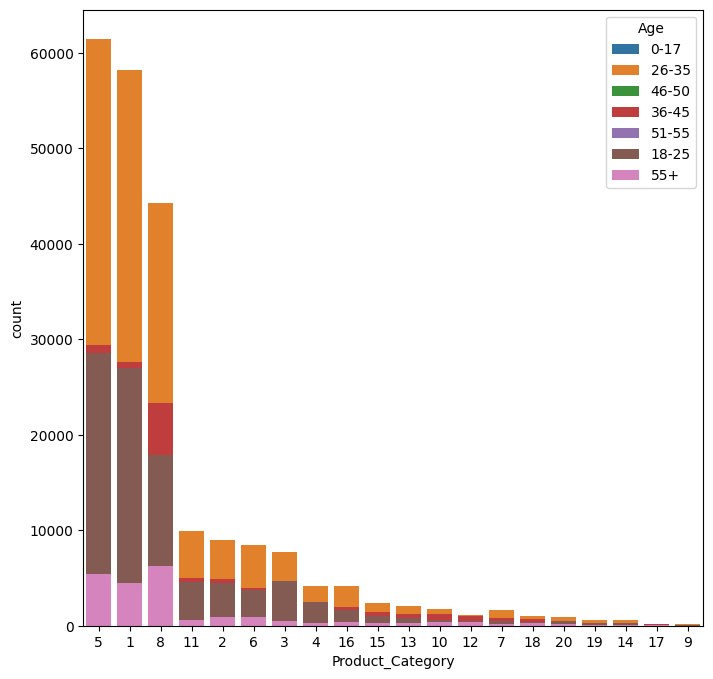

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(data=df,x='Product_Category',hue = 'Age',dodge = False,order = df['Product_Category'].value_counts().index)
plt.show()


*   Numbers of order for product category 5,1,8 are done by mostly  from  age group 26-35.



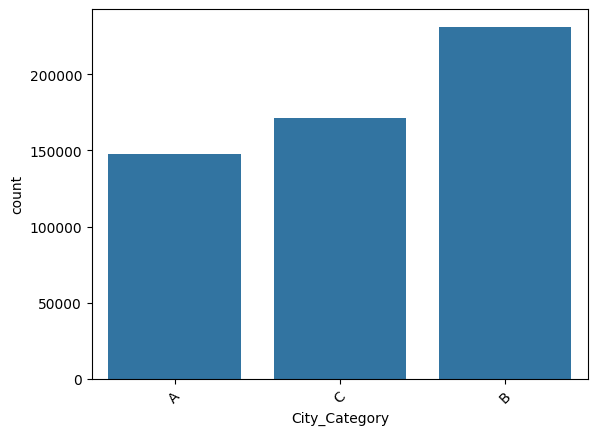

In [ ]:
sns.countplot(data =df,x = 'City_Category')
plt.xticks(rotation = 45)
plt.show()

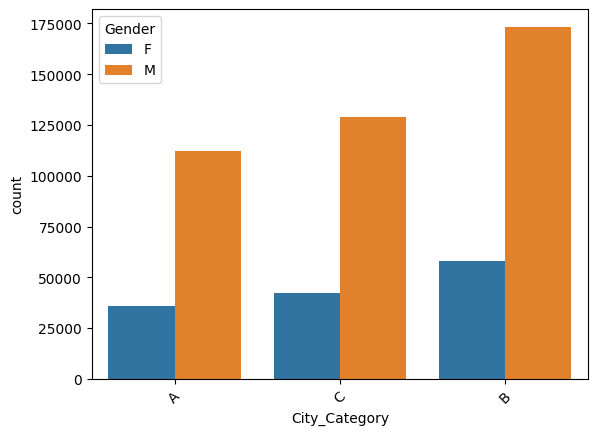

In [ ]:
sns.countplot(data =df,x = 'City_Category',hue = 'Gender')
plt.xticks(rotation = 45)
plt.show()

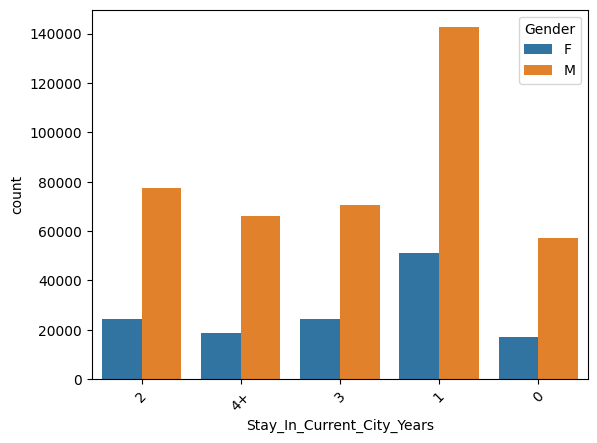

In [ ]:
sns.countplot(data =df,x = 'Stay_In_Current_City_Years',hue = 'Gender')
plt.xticks(rotation = 45)
plt.show()

Q:) Proportion of city_Category,age_group for male and femal gender ?

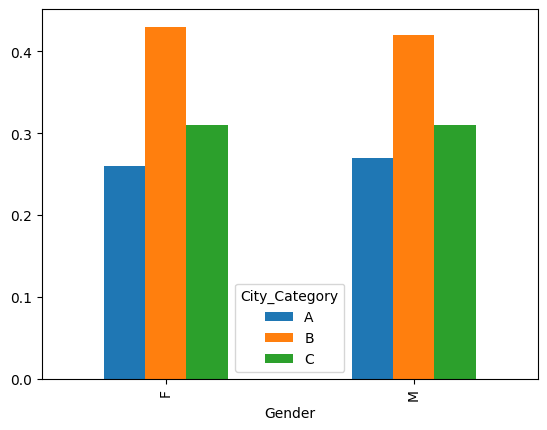

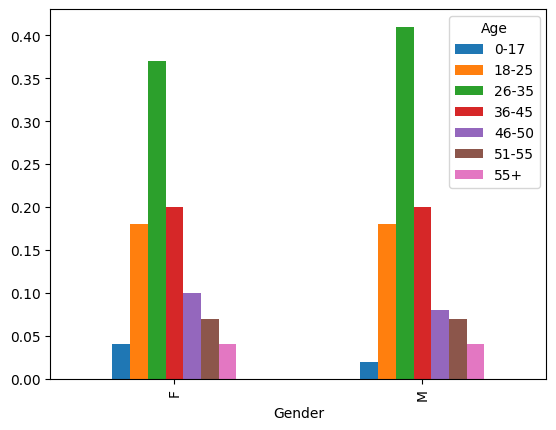

In [ ]:
cat_col = ['City_Category','Age']
for i in cat_col:
  np.round(pd.crosstab(index = df['Gender'],columns = df[i],normalize = 'index'),2).plot(kind = 'bar')


*   Proportion of different age group for male and female gender are almost same.
*   Proportion of city category group for male and female gender are almost same.


Q:) Proportion of Male and female for city_Category,age_group?

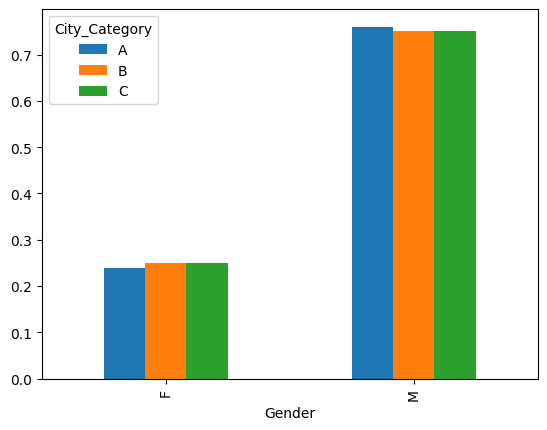

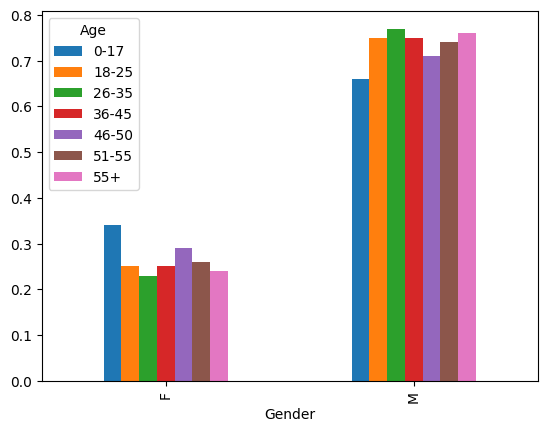

In [ ]:
cat_col = ['City_Category','Age']
for i in cat_col:
  np.round(pd.crosstab(index = df['Gender'],columns = df[i],normalize = 'columns'),2).plot(kind = 'bar')


*   Proportion of male with female across city_category are almost same.
*   Proportion of male with female across age group varries. Company is loosing customers of female for age group of 46-50 and above this age, whereas customers are increasing for males.
*   Female partricipation(ratio) for age group  26-35 is much lesser compare to male ratio
*   Female partricipation(ratio) for age group  0-17 is strong compare to other age group.









# Missing Value & Outlier Detection

<Axes: xlabel='Purchase'>

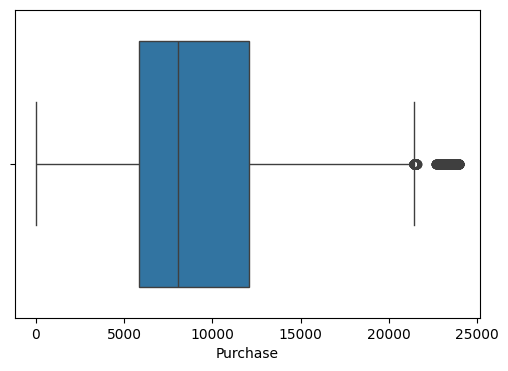

In [ ]:
plt.figure(figsize =(6,4))
sns.boxplot(data = df,x='Purchase')

In [ ]:
df_copy = df.copy()
percentile = df['Purchase'].quantile([.05,.95]).values
df_copy['Purchase'] = np.clip(df['Purchase'],percentile[0],percentile[1])

In [ ]:
df_copy

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1984
3,1000001,P00085442,F,0-17,10,A,2,0,12,1984
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,1984
550064,1006035,P00375436,F,26-35,1,C,3,0,20,1984
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,1984
550066,1006038,P00375436,F,55+,1,C,2,0,20,1984


<Axes: xlabel='Purchase'>

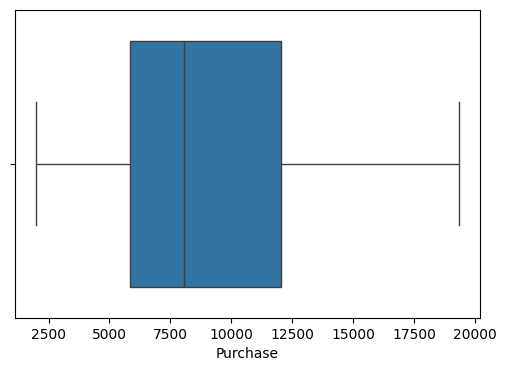

In [ ]:
plt.figure(figsize =(6,4))
sns.boxplot(data = df_copy,x='Purchase')

Outliers treatment done by clipping values to 5th percentile and 95th percentile for the purchase columns in order to remove the outliers.

Q:) Which gender has most number of outlier and how we can increase these outliers to increase sales ?

Male

In [ ]:
df_copyM = df[df['Gender']== 'M']
np.percentile(df_copyM['Purchase'],25),np.percentile(df_copyM['Purchase'],75)

(5863.0, 12454.0)

In [ ]:
IQR_M = np.percentile(df_copyM['Purchase'],75) - np.percentile(df_copyM['Purchase'],25)
IQR_M

6591.0

In [ ]:
# upper limit = Q3 + 1.5 * IQR
upper_limitM = np.percentile(df_copyM['Purchase'],75) + 1.5 * IQR_M
upper_limitM

22340.5

In [ ]:
# all the values greater than upper is outlier
df_copyM[df_copyM['Purchase']>upper_limitM].shape[0]

1812

Female

In [ ]:
df_copyF = df[df['Gender']== 'F']
np.percentile(df_copyF['Purchase'],25),np.percentile(df_copyF['Purchase'],75)

(5433.0, 11400.0)

In [ ]:
IQR_F = np.percentile(df_copyF['Purchase'],75) - np.percentile(df_copyF['Purchase'],25)
IQR_F

5967.0

In [ ]:
upper_limitF = np.percentile(df_copyF['Purchase'],75) + 1.5 * IQR_F
upper_limitF

20350.5

In [ ]:
df_copyF[df_copyF['Purchase']>upper_limitF].shape[0]

2065

We can conclude

*   Outliers for male in terms of number of orders is 1812 and for female 2065.
*   Company should focus on more product_category(i.e 10) advertisement to male gender increase these outliers number given there total unique customers are higher than female i.e 70%male and30% female(unique customers), these will increase the sales.


# CLT and Confidence Interval

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [ ]:
df.groupby(['Gender'])['Purchase'].agg(['mean','std','count'])

,mean,std,count
Gender,,,
F,8734.565765,4767.233289,135809
M,9437.526040,5092.186210,414259


# Q: How does gender affect the amount spent?

In [ ]:
df_M = df.loc[df['Gender']=='M']['Purchase']
df_F = df.loc[df['Gender']=='F']['Purchase']

In [ ]:
def bootstrapping(data,sample_size,iterations):
  bootstrapped_means =[]
  for reps in range(iterations):
    bootstr_sample = np.random.choice(data,size= sample_size)
    bootstrapped_means.append(np.mean(bootstr_sample))
  exp_df = pd.DataFrame(bootstrapped_means,columns =['Purchase_amt'])
  return sns.histplot(exp_df,kde= True)

<Axes: ylabel='Count'>

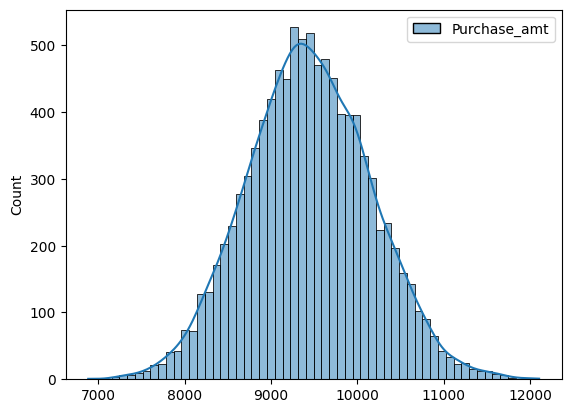

In [ ]:
bootstrapping(df_M,50,10000)

<Axes: ylabel='Count'>

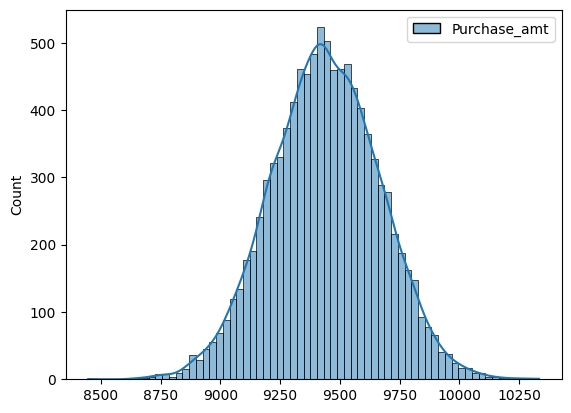

In [ ]:
bootstrapping(df_M,500,10000)

<Axes: ylabel='Count'>

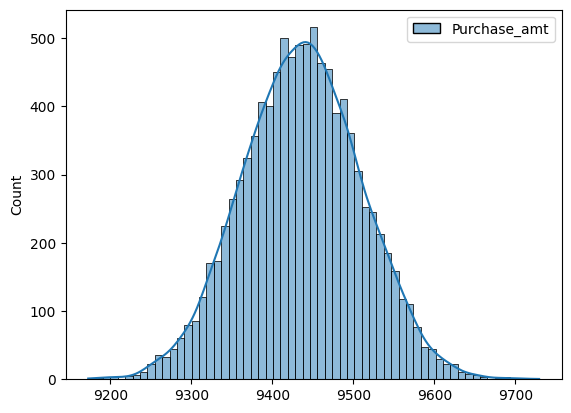

In [ ]:
bootstrapping(df_M,5000,10000)

(<Axes: ylabel='Count'>, <Axes: ylabel='Count'>, <Axes: ylabel='Count'>)

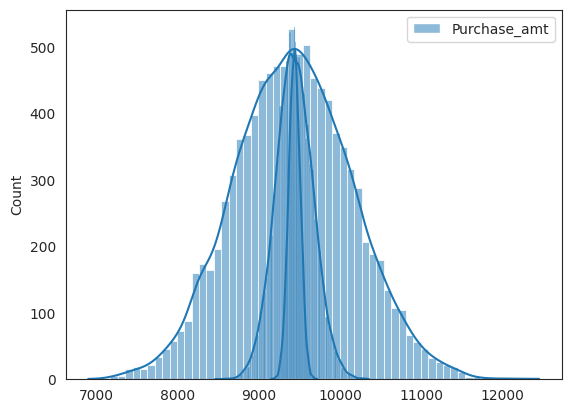

In [ ]:
#combining all of the graphs with sample size 50,500,5000 and iteration of 10000
bootstrapping(df_M,50,10000),bootstrapping(df_M,500,10000),bootstrapping(df_M,5000,10000)

Q:) How does the sample size affect the shape of the distributions of the means?

Ans:) As we go higher for sample size , the more  narrow the bell curve becomes. The more the sample size, less is the variance and our CI width also gets reduced making point estimates to population mean. This distribution is normal now.

In [ ]:
def bootstrapping_genstats(data,sample_size,iterations,confidence_level):
  bootstrapped_means =[]
  for reps in range(iterations):
    bootstr_sample = np.random.choice(data,size= sample_size)
    bootstrapped_means.append(np.mean(bootstr_sample))
  #return bootstrapped_means
  exp_df = pd.DataFrame(bootstrapped_means,columns =['Purchase_amt'])
  CI_lower = np.percentile(exp_df['Purchase_amt'], (100-confidence_level)/2)
  CI_Upper = np.percentile(exp_df['Purchase_amt'], ((100-confidence_level)/2 + confidence_level))
  CI_Width = CI_Upper - CI_lower
  return f"exp_df_mean {exp_df.mean()}",f"Pop_mean {data.mean()}", f"CI_lower {CI_lower}",f"CI_Upper {CI_Upper}",f"CI_Width {CI_Width}"

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 90% confidence for Male
bootstrapping_genstats(df_M,50,1000,90),bootstrapping_genstats(df_M,500,1000,90),bootstrapping_genstats(df_M,5000,1000,90)

(('exp_df_mean Purchase_amt    9427.8867\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 8294.878999999999',
  'CI_Upper 10571.176',
  'CI_Width 2276.2970000000005'),
 ('exp_df_mean Purchase_amt    9446.008938\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 9057.2703',
  'CI_Upper 9834.4439',
  'CI_Width 777.1736000000001'),
 ('exp_df_mean Purchase_amt    9438.13241\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 9328.68468',
  'CI_Upper 9555.77045',
  'CI_Width 227.08576999999968'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 90% confidence for Female
bootstrapping_genstats(df_F,50,1000,90),bootstrapping_genstats(df_F,500,1000,90),bootstrapping_genstats(df_F,5000,1000,90)

(('exp_df_mean Purchase_amt    8739.6581\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 7658.827',
  'CI_Upper 9829.508',
  'CI_Width 2170.6809999999996'),
 ('exp_df_mean Purchase_amt    8746.385616\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 8399.1955',
  'CI_Upper 9111.6269',
  'CI_Width 712.4313999999995'),
 ('exp_df_mean Purchase_amt    8735.362787\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 8631.022640000001',
  'CI_Upper 8845.47492',
  'CI_Width 214.45227999999952'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 95% confidence for Male
bootstrapping_genstats(df_M,50,1000,95),bootstrapping_genstats(df_M,500,1000,95),bootstrapping_genstats(df_M,5000,1000,95)

(('exp_df_mean Purchase_amt    9436.81594\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 8010.0815',
  'CI_Upper 10823.2115',
  'CI_Width 2813.129999999999'),
 ('exp_df_mean Purchase_amt    9427.967426\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 8999.40385',
  'CI_Upper 9864.88645',
  'CI_Width 865.4825999999994'),
 ('exp_df_mean Purchase_amt    9435.539255\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 9295.82166',
  'CI_Upper 9578.796779999999',
  'CI_Width 282.97511999999915'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 95% confidence for Female
bootstrapping_genstats(df_F,50,1000,95),bootstrapping_genstats(df_F,500,1000,95),bootstrapping_genstats(df_F,5000,1000,95)

(('exp_df_mean Purchase_amt    8745.34138\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 7441.6735',
  'CI_Upper 10067.15',
  'CI_Width 2625.4764999999998'),
 ('exp_df_mean Purchase_amt    8724.898314\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 8304.6924',
  'CI_Upper 9150.36945',
  'CI_Width 845.6770500000002'),
 ('exp_df_mean Purchase_amt    8731.7357\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 8601.657875',
  'CI_Upper 8854.46097',
  'CI_Width 252.8030949999993'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 99% confidence for Male
bootstrapping_genstats(df_M,50,1000,99),bootstrapping_genstats(df_M,500,1000,99),bootstrapping_genstats(df_M,5000,1000,99)

(('exp_df_mean Purchase_amt    9416.94212\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 7697.6799',
  'CI_Upper 11409.6203',
  'CI_Width 3711.9404000000004'),
 ('exp_df_mean Purchase_amt    9446.501084\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 8891.45659',
  'CI_Upper 10015.18207',
  'CI_Width 1123.725480000001'),
 ('exp_df_mean Purchase_amt    9436.015643\ndtype: float64',
  'Pop_mean 9437.526040472265',
  'CI_lower 9264.752414999999',
  'CI_Upper 9609.084959',
  'CI_Width 344.3325440000008'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 99% confidence for Female
bootstrapping_genstats(df_F,50,1000,99),bootstrapping_genstats(df_F,500,1000,99),bootstrapping_genstats(df_F,5000,1000,99)

(('exp_df_mean Purchase_amt    8782.72086\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 7125.0643',
  'CI_Upper 10769.0351',
  'CI_Width 3643.970799999999'),
 ('exp_df_mean Purchase_amt    8733.783404\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 8230.41501',
  'CI_Upper 9266.87161',
  'CI_Width 1036.4565999999995'),
 ('exp_df_mean Purchase_amt    8737.765227\ndtype: float64',
  'Pop_mean 8734.565765155476',
  'CI_lower 8557.350145',
  'CI_Upper 8910.294113',
  'CI_Width 352.9439679999996'))

Q:- From the above calculated CLT answer the following questions.


1.   Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
2.   How is the width of the confidence interval affected by the sample size?
3.   Do the confidence intervals for different sample sizes overlap?


Ans

1.  We calculated for 90%,95% and 99% confidence level CI and came to the conclusion that none of gender has significant wider CI than other, there is slightly wider CI for male compare to female.
2.   Width of CI gets tighten i.e shorter as we increase sample size(30,300,3000) shown above for both Male and Female and width of CI gets wider as we increase our confidence level.
3. Yes they do overlap for different sample sizes.As we increase sample size our CI width gets reduced and it give range of CI where our population mean will lie.

CI intervals are overlapping for male and female for small sample size 50 but when we increase to 500,5000 CI intervals are not overlapping and we can clearly see the difference in both range, this concludes for all type of confidence level.(90,95,99%)

Female   
*   CI_Interval =(8500-8900)

Male
*   CI_Interval =(9200-9700)
This approximate CI interval considering all type of 90,95,99% confidence.

So in totality Male spendings are higher than female.


# Q: How does Marital_Status affect the amount spent?

In [ ]:
df_0 = df.loc[df['Marital_Status']==0]['Purchase']
df_1 = df.loc[df['Marital_Status']==1]['Purchase']

(<Axes: ylabel='Count'>, <Axes: ylabel='Count'>, <Axes: ylabel='Count'>)

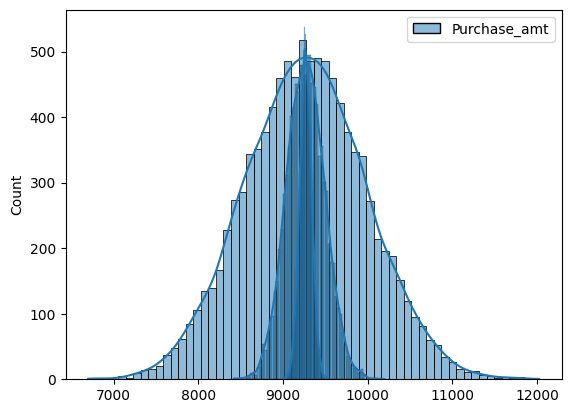

In [ ]:
bootstrapping(df_0,50,10000),bootstrapping(df_0,500,10000),bootstrapping(df_0,5000,10000)

Q:) How does the sample size affect the shape of the distributions of the means?

Ans:) As we go higher for sample size , the more  narrow the bell curve becomes. The more the sample size, less is the variance and our CI width also gets reduced making point estimates to population mean. This distribution is normal now.

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 95% confidence for 0 Marital_Status
bootstrapping_genstats(df_0,50,1000,95),bootstrapping_genstats(df_0,500,1000,95),bootstrapping_genstats(df_0,5000,1000,95)

(('exp_df_mean Purchase_amt    9255.13956\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 7928.059',
  'CI_Upper 10748.0265',
  'CI_Width 2819.9674999999997'),
 ('exp_df_mean Purchase_amt    9279.091776\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 8833.0488',
  'CI_Upper 9694.823',
  'CI_Width 861.7741999999998'),
 ('exp_df_mean Purchase_amt    9263.820054\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 9131.532720000001',
  'CI_Upper 9400.040195000001',
  'CI_Width 268.50747500000034'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 95% confidence for 1 Marital_Status
bootstrapping_genstats(df_1,50,1000,95),bootstrapping_genstats(df_1,500,1000,95),bootstrapping_genstats(df_1,5000,1000,95)

(('exp_df_mean Purchase_amt    9214.91026\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 7703.0255',
  'CI_Upper 10672.810500000001',
  'CI_Width 2969.7850000000017'),
 ('exp_df_mean Purchase_amt    9265.82374\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 8791.69995',
  'CI_Upper 9704.2171',
  'CI_Width 912.5171499999997'),
 ('exp_df_mean Purchase_amt    9260.818183\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 9125.744770000001',
  'CI_Upper 9398.802505000001',
  'CI_Width 273.0577350000003'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 90% confidence for 0 Marital_Status
bootstrapping_genstats(df_0,50,1000,90),bootstrapping_genstats(df_0,500,1000,90),bootstrapping_genstats(df_0,5000,1000,90)

(('exp_df_mean Purchase_amt    9298.5294\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 8183.216',
  'CI_Upper 10485.556',
  'CI_Width 2302.34'),
 ('exp_df_mean Purchase_amt    9266.558086\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 8890.627999999999',
  'CI_Upper 9622.586',
  'CI_Width 731.9580000000005'),
 ('exp_df_mean Purchase_amt    9263.063518\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 9146.22823',
  'CI_Upper 9375.021630000001',
  'CI_Width 228.79340000000047'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 90% confidence for 1 Marital_Status
bootstrapping_genstats(df_1,50,1000,90),bootstrapping_genstats(df_1,500,1000,90),bootstrapping_genstats(df_1,5000,1000,90)

(('exp_df_mean Purchase_amt    9255.47108\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 8128.675',
  'CI_Upper 10502.173999999999',
  'CI_Width 2373.498999999999'),
 ('exp_df_mean Purchase_amt    9267.100462\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 8903.868699999999',
  'CI_Upper 9640.6713',
  'CI_Width 736.8026000000009'),
 ('exp_df_mean Purchase_amt    9259.041203\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 9143.95618',
  'CI_Upper 9374.024519999999',
  'CI_Width 230.0683399999998'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 99% confidence for 0 Marital_Status
bootstrapping_genstats(df_0,50,1000,99),bootstrapping_genstats(df_0,500,1000,99),bootstrapping_genstats(df_0,5000,1000,99)

(('exp_df_mean Purchase_amt    9254.65016\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 7406.6723',
  'CI_Upper 11229.361299999999',
  'CI_Width 3822.6889999999985'),
 ('exp_df_mean Purchase_amt    9252.346782\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 8696.55983',
  'CI_Upper 9836.11764',
  'CI_Width 1139.5578100000002'),
 ('exp_df_mean Purchase_amt    9266.460874\ndtype: float64',
  'Pop_mean 9265.907618921507',
  'CI_lower 9071.4848',
  'CI_Upper 9451.277629',
  'CI_Width 379.792829'))

In [ ]:
#sample size of 50,500,5000 and 1000 iterations for 99% confidence for 1 Marital_Status
bootstrapping_genstats(df_1,50,1000,99),bootstrapping_genstats(df_1,500,1000,99),bootstrapping_genstats(df_1,5000,1000,99)

(('exp_df_mean Purchase_amt    9257.61468\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 7557.334500000001',
  'CI_Upper 11098.8897',
  'CI_Width 3541.555199999999'),
 ('exp_df_mean Purchase_amt    9264.239184\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 8732.48767',
  'CI_Upper 9806.90804',
  'CI_Width 1074.4203699999998'),
 ('exp_df_mean Purchase_amt    9261.735115\ndtype: float64',
  'Pop_mean 9261.174574082374',
  'CI_lower 9090.855537',
  'CI_Upper 9448.239250999999',
  'CI_Width 357.3837139999996'))

Q:- From the above calculated CLT answer the following questions.


1.   Is the confidence interval computed using the entire dataset wider for
one of the marital_status? Why is this the case?
2.   How is the width of the confidence interval affected by the sample size?
3.   Do the confidence intervals for different sample sizes overlap?


Ans

1.  For 90%,95%,99% Confidence level we cant conclude there is significant  wider CI for marital_status of 0 or 1.
2.   Width of CI gets tighten as we increase sample size(50,500,5000) shown above for both 0 and 1 marital_status for 90%,95%,99% confidence level giving us the point estimates to population mean.
3. Yes they do overlap for different sample sizes.As we increase sample size our CI width gets reduced and it give range of CI where our population mean will lie.

CI intervals are overlapping for 0 and 1 for 90,95%,99% for sample of 50,500 and 5000 and we cant conclude anything for 0 or 1 independently.We cannot confidently say that there is a significant difference between them in spending based on marital status.

CI intervals for 0 and 1 9000-9500 for both 0 and 1 marital_status for 90,95%,99% condifence. For every confidence level range lies almost same.



# Q:) How does Age affect the amount spent?

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
df_26_35 = df.loc[df['Age']=='26-35']['Purchase']
df_36_45 = df.loc[df['Age']=='36-45']['Purchase']
df_18_25 = df.loc[df['Age']=='18-25']['Purchase']
df_0_17 = df.loc[df['Age']=='0-17']['Purchase']
df_55_ = df.loc[df['Age']=='55+']['Purchase']
df_46_50 = df.loc[df['Age']=='46-50']['Purchase']
df_51_55 = df.loc[df['Age']=='51-55']['Purchase']

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of 0-17
bootstrapping_genstats(df_0_17,5000,1000,90)

('exp_df_mean Purchase_amt    8931.821979\ndtype: float64',
 'Pop_mean 8933.464640444974',
 'CI_lower 8818.622659999999',
 'CI_Upper 9053.47797',
 'CI_Width 234.85531000000083')

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of 18-25
bootstrapping_genstats(df_18_25,5000,1000,90)

('exp_df_mean Purchase_amt    9169.008903\ndtype: float64',
 'Pop_mean 9169.663606261289',
 'CI_lower 9055.49857',
 'CI_Upper 9292.76118',
 'CI_Width 237.26260999999977')

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of 26-35
bootstrapping_genstats(df_26_35,5000,1000,90)

('exp_df_mean Purchase_amt    9253.608164\ndtype: float64',
 'Pop_mean 9252.690632869888',
 'CI_lower 9139.92842',
 'CI_Upper 9376.48661',
 'CI_Width 236.55818999999974')

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of 36-45
bootstrapping_genstats(df_36_45,5000,1000,90)

('exp_df_mean Purchase_amt    9329.85306\ndtype: float64',
 'Pop_mean 9331.350694917874',
 'CI_lower 9214.2589',
 'CI_Upper 9443.00076',
 'CI_Width 228.7418600000001')

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of 45-50
bootstrapping_genstats(df_46_50,5000,1000,90)

('exp_df_mean Purchase_amt    9210.349803\ndtype: float64',
 'Pop_mean 9208.625697468327',
 'CI_lower 9098.58035',
 'CI_Upper 9323.272149999999',
 'CI_Width 224.6917999999987')

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of 51-55
bootstrapping_genstats(df_51_55,5000,1000,90)

('exp_df_mean Purchase_amt    9535.282286\ndtype: float64',
 'Pop_mean 9534.808030960236',
 'CI_lower 9414.519',
 'CI_Upper 9654.86495',
 'CI_Width 240.345949999999')

In [ ]:
#sample size of 5000 and 1000 iterations for 90% confidence for age group of above 55
bootstrapping_genstats(df_55_,5000,1000,90)

('exp_df_mean Purchase_amt    9337.440293\ndtype: float64',
 'Pop_mean 9336.280459449405',
 'CI_lower 9217.305219999998',
 'CI_Upper 9450.14673',
 'CI_Width 232.84151000000202')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of 0-17
bootstrapping_genstats(df_0_17,5000,1000,95)

('exp_df_mean Purchase_amt    8932.13428\ndtype: float64',
 'Pop_mean 8933.464640444974',
 'CI_lower 8796.18085',
 'CI_Upper 9067.58938',
 'CI_Width 271.4085299999988')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of 18-25
bootstrapping_genstats(df_18_25,5000,1000,95)

('exp_df_mean Purchase_amt    9171.760562\ndtype: float64',
 'Pop_mean 9169.663606261289',
 'CI_lower 9031.30171',
 'CI_Upper 9309.112770000002',
 'CI_Width 277.8110600000018')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of 26-35
bootstrapping_genstats(df_26_35,5000,1000,95)

('exp_df_mean Purchase_amt    9251.229979\ndtype: float64',
 'Pop_mean 9252.690632869888',
 'CI_lower 9120.094650000001',
 'CI_Upper 9393.239075',
 'CI_Width 273.1444249999986')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of 36-45
bootstrapping_genstats(df_36_45,5000,1000,95)

('exp_df_mean Purchase_amt    9331.606607\ndtype: float64',
 'Pop_mean 9331.350694917874',
 'CI_lower 9188.98296',
 'CI_Upper 9471.274765',
 'CI_Width 282.29180500000075')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of 46-50
bootstrapping_genstats(df_46_50,5000,1000,95)

('exp_df_mean Purchase_amt    9207.542119\ndtype: float64',
 'Pop_mean 9208.625697468327',
 'CI_lower 9061.79967',
 'CI_Upper 9340.93563',
 'CI_Width 279.1359599999996')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of 51-55
bootstrapping_genstats(df_51_55,5000,1000,95)

('exp_df_mean Purchase_amt    9537.783364\ndtype: float64',
 'Pop_mean 9534.808030960236',
 'CI_lower 9394.737430000001',
 'CI_Upper 9689.424205',
 'CI_Width 294.6867749999983')

In [ ]:
#sample size of 5000 and 1000 iterations for 95% confidence for age group of above 55
bootstrapping_genstats(df_55_,5000,1000,95)

('exp_df_mean Purchase_amt    9337.330036\ndtype: float64',
 'Pop_mean 9336.280459449405',
 'CI_lower 9187.187315',
 'CI_Upper 9481.34691',
 'CI_Width 294.159595000001')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of 0-17
bootstrapping_genstats(df_0_17,5000,1000,99)

('exp_df_mean Purchase_amt    8937.198754\ndtype: float64',
 'Pop_mean 8933.464640444974',
 'CI_lower 8759.216534',
 'CI_Upper 9110.077261999999',
 'CI_Width 350.86072799999965')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of 18-25
bootstrapping_genstats(df_18_25,5000,1000,99)

('exp_df_mean Purchase_amt    9166.207988\ndtype: float64',
 'Pop_mean 9169.663606261289',
 'CI_lower 8990.900152999999',
 'CI_Upper 9353.282326999999',
 'CI_Width 362.3821740000003')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of 26-35
bootstrapping_genstats(df_26_35,5000,1000,99)

('exp_df_mean Purchase_amt    9255.227633\ndtype: float64',
 'Pop_mean 9252.690632869888',
 'CI_lower 9070.749005',
 'CI_Upper 9436.751561',
 'CI_Width 366.00255599999946')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of 36-45
bootstrapping_genstats(df_36_45,5000,1000,99)

('exp_df_mean Purchase_amt    9330.975922\ndtype: float64',
 'Pop_mean 9331.350694917874',
 'CI_lower 9146.797956',
 'CI_Upper 9508.292624',
 'CI_Width 361.49466799999936')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of 46-50
bootstrapping_genstats(df_46_50,5000,1000,99)

('exp_df_mean Purchase_amt    9208.942724\ndtype: float64',
 'Pop_mean 9208.625697468327',
 'CI_lower 9034.714397',
 'CI_Upper 9378.655046',
 'CI_Width 343.9406490000001')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of 51-55
bootstrapping_genstats(df_51_55,5000,1000,99)

('exp_df_mean Purchase_amt    9537.766416\ndtype: float64',
 'Pop_mean 9534.808030960236',
 'CI_lower 9355.515276',
 'CI_Upper 9705.934529999999',
 'CI_Width 350.41925399999855')

In [ ]:
#sample size of 5000 and 1000 iterations for 99% confidence for age group of above 55
bootstrapping_genstats(df_55_,5000,1000,99)

('exp_df_mean Purchase_amt    9333.280384\ndtype: float64',
 'Pop_mean 9336.280459449405',
 'CI_lower 9159.4421',
 'CI_Upper 9511.979387000001',
 'CI_Width 352.537287000001')

Q:- From the above calculated CLT answer the following questions.


1.   Is the confidence interval computed using the entire dataset wider for
one of the marital_status? Why is this the case?
2.   How is the width of the confidence interval affected by the sample size?
3.   Do the confidence intervals for different sample sizes overlap?


Ans

1.  For 90%,95%,99% Confidence level we cant conclude there is significant  wider CI for any age group.
2.   Width of CI gets tighten as we increase sample size(50,500,5000) shown above for 90%,95%,99% confidence level giving us the point estimates to population mean.
3. CI interval for different sample sizes overlap for 5000 sample size.

CI intervals are overlapping for every age group except 0-17 for 90,95%,99% for sample size of 5000. There are no significant difference in range of any group.


*   Age group of 51-55 has spend more compare to other age group i.e in the range of (9300-9700 approx)
*   We can also conclude for age group of 0-17 spendings are less as their CI intervals are also lower compare to other age group (8700-9100 approx) and can be differentiated from others.
*   All the other group are spending in the range of (9100-9500 approx)








# Final Insights


*   Unique male customers are 72% and female 28% and total amount spent by them also are in same proportion i.e we can say company is earning more from male customers.
*   Age group 26-35 made orders the most i.e 40% orders are from these age group although contribution of female in this group is very small.
*   Age group of 0-17 has significant proportion of females compare to male.
*   For age group after 35, female contribution is being reduced.
*   Unique customers are much higher for city category C i.e 54% whereas for B it is 29% but number of orders(42%) and total amount spent(42%) by city category B are higher than C.
*   Average order amount for all age group is around (9100-9500) except for age group 0-17 which has mean of range(8700-9100).
*  Average order amount for male is in range (9100-9700), where as for female it is low in range of (8500-8900).
*   Average order amount in terms of marital status 0 and 1 are almost same.We can say there is no differentiation in terms of spending power between marital status.
*   Numbers of female customers are low as compare to male in all the age group except 0-17.
*   Females are more contributing to outliers(2065 number of order)i.e orders above approx 20k given their unique customers are very low,whereas for male 1812 number of order.
*   Producs in range 15-20k were ordered most number of times.Product category of 5,1,8 were mostly bought.
*   Product_category 2,10 are being bought mostly from city category B.
*   C city category has highest average amount of order value i.e 9800 but lesser number of orders.
*   Product category 10 is the costliest category.
*   Numbers of orders for product category 5,1,8 for age group 26-35 are much higher.








# Recommendation


*   Manegement should focus on giving promotional offers to female who are in the age group of 26-35 more focusingly because most number of orders are from that age group and female contribution is very low
*   Management should work on introducing products which has around 15-20k average value almost equivalent to product category 10.
*   Management should give offer/ad campaign to male customers for the product which has an average value of above 20k because female portion for this value range is significant compare to male.(outlier of female are almost comparable to male shown above in INSIGHTS)
*   Sales are very low for city category C and to increase sales in this mangement should advertisement for product_category 2,10 which are low in C but in city B number of order for this product category is strong given the unique customers are very low compare to city C.
*   Cashback should be given to customer of city category A for doing 1st time purchase because unique customers are very low, management should work on for customer acquisition in city category A.
*   Management should work on more products for age group of above 35 and above because those age group spending are reducing.
*   Management should give festival offers on products category other than 5,1,8 to boost sales.
*   Management in overall should focus on customer acquisation for female as this will increase sales.












